# Bayesian Linear Regression
Based on the Seoul Bike Sharing Demand dataset located at ../data/SeoulBikeData.csv
Load the data and split into train and test sets, 80% for training and 20% for testing.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [13]:
file_path = '../data/SeoulBikeData.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)

encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(df[['Seasons', 'Holiday', 'Functioning Day']])
encoded_col_names = encoder.get_feature_names_out(['Seasons', 'Holiday', 'Functioning Day'])
df_encoded = pd.DataFrame(encoded_columns, columns=encoded_col_names)

df = df.join(df_encoded).drop(['Seasons', 'Holiday', 'Functioning Day'], axis=1)

scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

X = df.drop('Rented Bike Count', axis=1)
y = df['Rented Bike Count']

print(X.head())
print('---------------------')
print(y.head())

       Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0 -1.661325        -1.513957    -1.042483          0.458476          0.925871   
1 -1.516862        -1.539074    -0.993370         -0.892561          0.925871   
2 -1.372399        -1.580936    -0.944257         -0.699556          0.925871   
3 -1.227936        -1.597680    -0.895144         -0.796059          0.925871   
4 -1.083473        -1.580936    -1.091596          0.554978          0.925871   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                  -1.659605                -0.655132       -0.1318   
1                  -1.659605                -0.655132       -0.1318   
2                  -1.667262                -0.655132       -0.1318   
3                  -1.659605                -0.655132       -0.1318   
4                  -1.736177                -0.655132       -0.1318   

   Snowfall (cm)      Year     Month       Day  Seasons_Autumn  \
0      -0.171891 -3.

E:\envis\Anaconda3\envs\ml_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Hour                         float64
Temperature(°C)              float64
Humidity(%)                  float64
Wind speed (m/s)             float64
Visibility (10m)             float64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Year                         float64
Month                        float64
Day                          float64
Seasons_Autumn               float64
Seasons_Spring               float64
Seasons_Summer               float64
Seasons_Winter               float64
Holiday_Holiday              float64
Holiday_No Holiday           float64
Functioning Day_No           float64
Functioning Day_Yes          float64
dtype: object
---------------------
               Hour  Temperature(°C)   Humidity(%)  Wind speed (m/s)  \
count  8.760000e+03     8.760000e+03  8.760000e+03      8.760000e+03   
mean   2.027805e-19     9.733462e-17  1.362685e-16     -4.542282e-17   
std    1

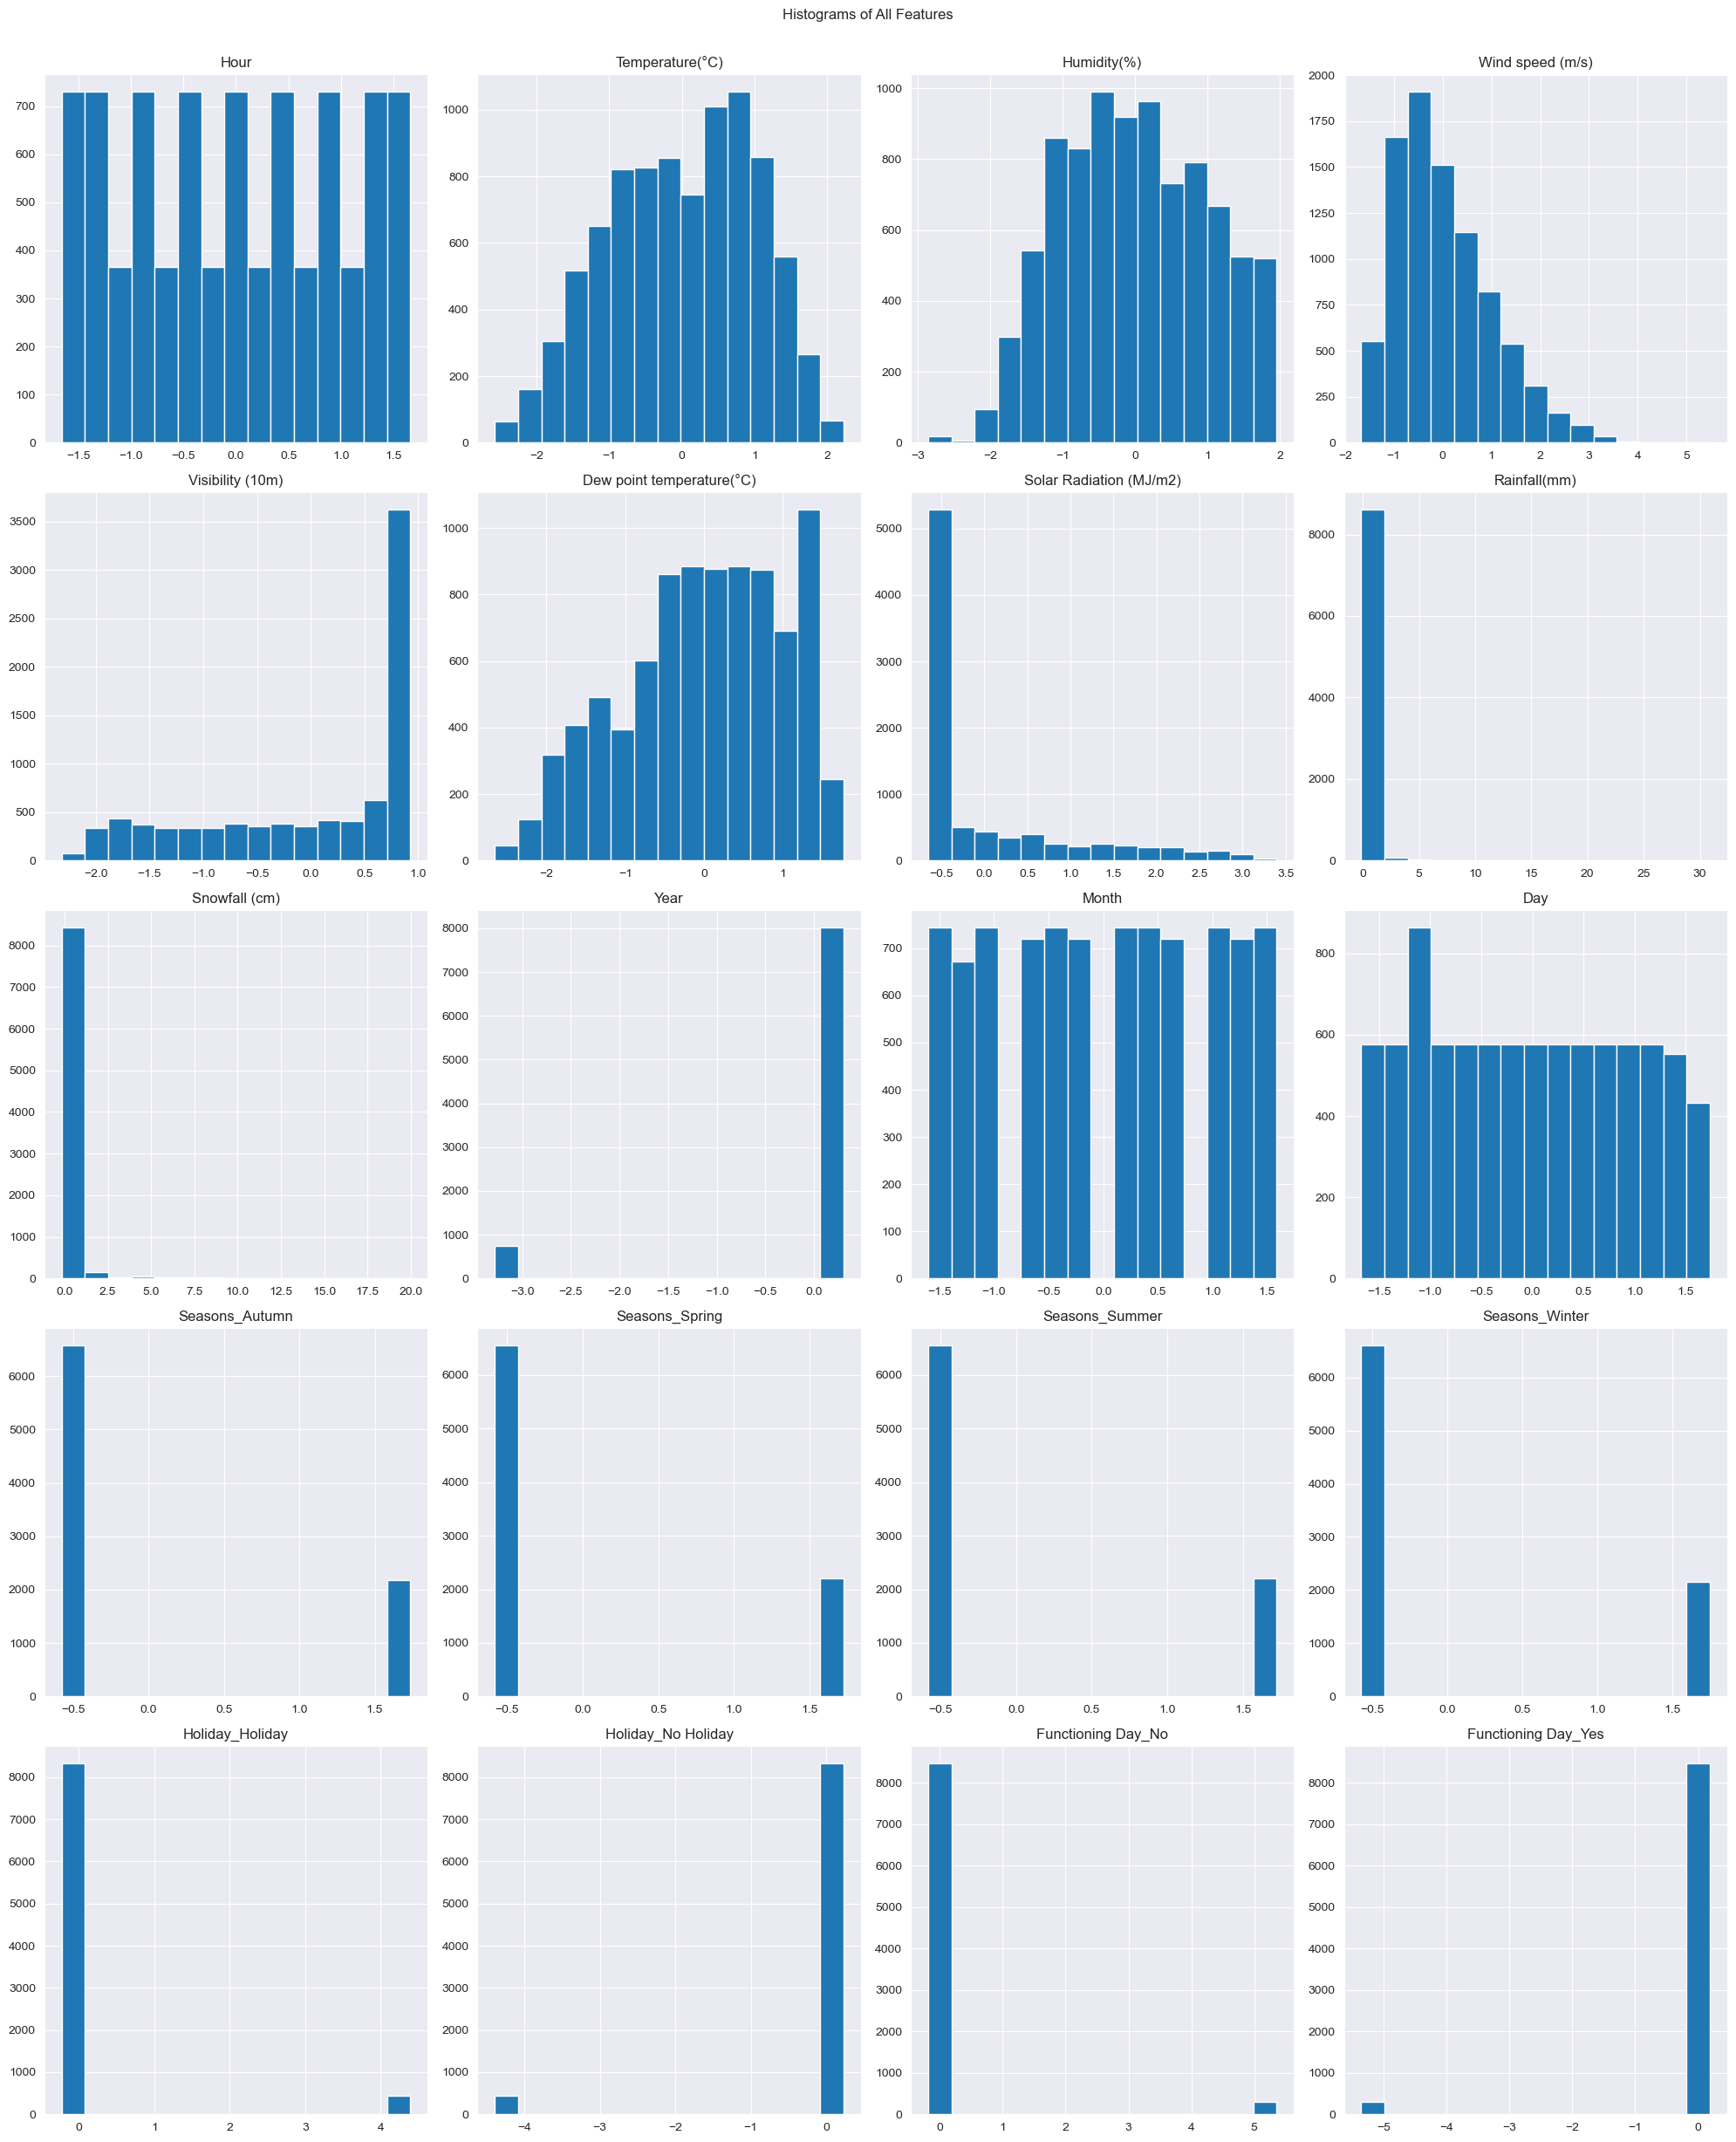

Training set size: (7008, 20)
Test set size: (1752, 20)
(7008,)
(1752,)


In [20]:
# verify that the data is loaded correctly
print(X.dtypes)
print('---------------------')
print(X.describe().head())
print('---------------------')

X = df.drop('Rented Bike Count', axis=1)
y = df['Rented Bike Count']

num_features = X.shape[1]

num_rows = num_features // 4
if num_features % 4 > 0:
    num_rows += 1

fig, axs = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))
fig.suptitle('Histograms of All Features')

axs = axs.ravel()

for i, col in enumerate(X.columns):
    axs[i].hist(X[col], bins=15)
    axs[i].set_title(col)

for i in range(num_features, len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print(y_train.shape)
print(y_test.shape)